# Data Study

EDA of the Project NULLS Study, Text treatment, and output of several dataframe with the Dimension info for further analysis.

In [5]:
import pandas as pd
from collections import Counter
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import ast

pd.set_option('max_colwidth', 250)

In [11]:
data = pd.read_csv('../Data/204kProducts.csv', sep = ';', index_col=False)
# In case you want to load your own dataset change the name to RAW_PRODUCTS
data.head()

C:\Users\enric\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,8,11,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,alternative_id,availability_date,badges,brand,category,discount,eci_provider,gtin,id,image,media,module_name,name,position,price,quantity,status,store_id,variant,vendor
0,A28233506,NaN,['express_delivery'],Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.401700e+12,1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,{'count': 1},NaN,Abrigo masculino con textura de mujer,NaN,"{'final': 199, 'currency': 'EUR'}",1,show_pdp,60,001060651400131002,NaN
1,A29054782,NaN,['express_delivery'],Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.606514e+12,1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,{'count': 1},NaN,Abrigo doble faz de mujer con cinturón a tono,NaN,"{'final': 149, 'currency': 'EUR'}",1,show_pdp,60,001060651400180002,NaN
2,A27354432,NaN,['express_delivery'],Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.510564e+12,1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,{'count': 1},NaN,Abrigo largo de antelina de mujer Woman El Corte Inglés,NaN,"{'final': 89.99, 'currency': 'EUR'}",1,show_pdp,60,001051056400107002,NaN
3,A28302706,NaN,['express_delivery'],Lloyd's,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.401701e+12,1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,{'count': 1},NaN,Chaqueta térmica de mujer Lloyds con efecto cortavientos,NaN,"{'final': 129, 'currency': 'EUR'}",1,show_pdp,60,001019350401147002,NaN
4,A27435502,NaN,['express_delivery'],Lloyd's,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.193534e+12,1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,{'count': 1},NaN,Parka 100% algodón de mujer Lloyds con capucha,NaN,"{'final': 149, 'currency': 'EUR'}",1,show_pdp,60,001019353400229002,NaN


In [12]:
data.shape

(204812, 20)

In [13]:
data.columns

Index(['alternative_id', 'availability_date', 'badges', 'brand', 'category',
       'discount', 'eci_provider', 'gtin', 'id', 'image', 'media',
       'module_name', 'name', 'position', 'price', 'quantity', 'status',
       'store_id', 'variant', 'vendor'],
      dtype='object')

Delete Columns we jnow we will not need

In [14]:
data = data.drop(['alternative_id', 'availability_date', 'badges',
                 'discount', 'eci_provider', 'gtin', 'media', 'module_name',
                 'position', 'quantity', 'status', 'store_id', 
                 'variant', 'vendor'], axis = 1)
data.head()

,brand,category,id,image,name,price
0,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,Abrigo masculino con textura de mujer,"{'final': 199, 'currency': 'EUR'}"
1,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,Abrigo doble faz de mujer con cinturón a tono,"{'final': 149, 'currency': 'EUR'}"
2,Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,Abrigo largo de antelina de mujer Woman El Corte Inglés,"{'final': 89.99, 'currency': 'EUR'}"
3,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,Chaqueta térmica de mujer Lloyds con efecto cortavientos,"{'final': 129, 'currency': 'EUR'}"
4,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,Parka 100% algodón de mujer Lloyds con capucha,"{'final': 149, 'currency': 'EUR'}"


### I save the Brands in case i want to use them later

In [18]:
data.to_csv('../Data/Brands.csv', sep = ';',index=False, encoding = 'UTF-8', index_label=False)

 ---

### Nulos?

C:\Users\enric\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


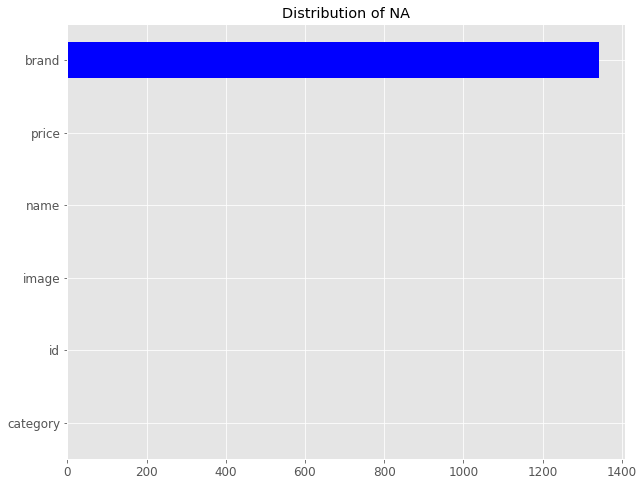

In [19]:
fig = plt.figure(figsize=(10, 8))
plt.title("Distribution of NA")
data.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Blue', fontsize=12)

We only have nulls on the brands. About 1200 null which represent a 0.4%, therefore its not important, besides we will add the brand to the text so in case we have an Na we will not add it.

## Category

In [20]:
data_copy = data.copy()

In [21]:
for i, lista in enumerate(data_copy['category'].values):
    data_copy['category'].values[i] = ast.literal_eval(lista)
for i, elem in enumerate(data_copy['category']):
    data_copy['category'].values[i] = [x.replace(" ", "_") for x in elem ]

In [24]:
# Comentar for joining only the elements of each list
data_copy['category'] = data_copy['category'].apply(lambda x: '_'.join(x))

In [25]:
data_copy['category'][100050]

'Electrodomésticos_Aire_acondicionado_Split_Split_1_x_1'

Now we can get which are the most common categories

### Top Categories

In [27]:
n_categories = data_copy['category'].value_counts()
print (n_categories[:5])
print (len(n_categories))
print (len(n_categories[n_categories > 10 ]))
print (n_categories[n_categories > 10 ][-10:])

Moda_Joyería_y_Relojes_Relojes_Hombre    1843
Moda_Joyería_y_Relojes_Relojes_Mujer     1685
Moda_Mujer_Punto_y_Jerseys               1437
Moda_Mujer_Camisetas                     1307
Moda                                     1287
Name: category, dtype: int64
3671
1715
Perfumería_Tecnobelleza_Cuidado_Facial_y_Corporal_Tratamiento_Corporal       11
Hogar_Menaje_de_cocina_Para_preparar_Escurridores                            11
Libros_Infantiles_y_juveniles_Infantil_0-3_años_-_PRELECTURA_PREESCRITURA    11
Perfumería_Fragancias_Hombre_Fragancias_Eau_de_Cologne                       11
BriCor_Baño_Accesorios_de_Baño_Toalleros_pared_Hotel                         11
Hogar_Textil_decoración_Pufs                                                 11
Deportes_Hombre_Zapatillas_y_Botas_Baloncesto                                11
Electrónica_Sonido_Tocadiscos_Agujas_tocadiscos                              11
Hogar_Iluminación_Led_Lámparas_de_pie_LED                                    11
Mini_Home_-

With the categories the objective will be similar to the brand, adding it to the text

#### Let´s save the categories

In [28]:
subset = data_copy[['id', 'category']]
#subset = subset.groupby('category').apply(lambda x: x['id'].values.tolist()).reset_index(name='col')

In [29]:
subset.head()

,id,category
0,1060651400131,Moda_Mujer_Abrigos
1,1060651400180,Moda_Mujer_Abrigos
2,1051056400107,Moda_Mujer_Abrigos
3,1019350401147,Moda_Mujer_Abrigos
4,1019353400229,Moda_Mujer_Abrigos


In [30]:
subset.to_csv('../Data/Categories.csv', sep = ';', index=False, encoding = 'UTF-8', index_label=False)

### Price

We are gonna drop the Price beacuse will not have any data of the Customer so we dont want to get False conclussions like this Customer buys more expensive Products than this one, but in cae of having full Metadata of the Customer we will need it.

In [32]:
data = data.drop(['price'], axis = 1)
data.head()

KeyError: "['price'] not found in axis"

In [33]:
data.loc[70000]

brand                                                                                 El Corte Inglés
category                                      ['Hogar', 'Menaje de mesa', 'Café y té', 'Tazas de té']
id                                                                                    001007227340655
image       http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201803/12/00107227340655____1__640x640.jpg
name                                                        Set de 2 tazas de té Buga El Corte Inglés
Name: 70000, dtype: object

## Images

In [34]:
images = data[['id', 'image']]
images.head()

,id,image
0,1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg
1,1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg
2,1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg
3,1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg
4,1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg


In [35]:
images.to_csv('../Data/Images.csv', sep = ';', index=False, encoding = 'UTF-8')

---